### **16.Регуляризация А.Н. Тихонова**

Система $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ называется регуляризованной по отношению к системе $Ax = b$. Параметр $\alpha$ называется параметром регуляризации. Метод регуляризации А.Н.\,Тихонова заключается в выборе последовательности $\alpha_k \to 0$ (например, геометрической прогрессии) и решении регуляризованных систем $(A^{\rm T}A + \alpha_k E)x = A^{\rm T} b$ для конечного числа значений $\alpha_k$, и выборе из всех полученных решений того, при котором норма невязки для исходной системы минимальна.

Написать функцию

    x0, discr0, alpha0, x, discr = tikhonov(A, b, alpha),
в которой A и b – матрица и левая часть исходной системы, alpha – вектор, содержащий набор параметров регуляризации, x – матрица, по столбцам которой записаны регуляризованные решения для соответсвующего значения параметра регуляризации, discr – вектор полученных таким образом невязок, x0 – регуляризованное решение (из найденных) с минимальной нормой невязки, discr0, alpha0 – соответствующие ему значения нормы невязки и параметра регуляризации.

Провести эксперимент с плохообусловленными системами из № 8.

Построить график зависимости ошибки и нормы невязки от порядка системы.

Для конкретной системы построить графики зависимости ошибки и нормы невязки от параметра alpha.

Интуиция: Система $(A^{\rm T}A+αE)x=A^{\rm T}b$ при маленьком $α\ge 0$ (например, $α=0$) может быть вырожденной или плохо обусловленной, что приводит к большим ошибкам при численном решении системы. При большом $α$ система хорошо обусловлена, но может слишком сильно отличаться от исходной системы $Ax=b$. Нужно найти компромисс, т.е. «оптимальное» значение $α$: не очень большое и не очень маленькое.

---

In [ ]:
import numpy as np
from numpy import random
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

Напишем функцию для решения регуляризованных систем $(A^{\rm T} A + \alpha E)x = A^{\rm T} b$ и выбора минимальной нормы невязки.

На вход поступает матрица, вектор и последовательность параметров регуляризации

Далее создаются необходимые переменные и производится решение системы для каждого параметра регуляризации с помощью функции `linalg.solve()` из модуля scipy. Каждое решение заносится в отдельную матрицу x с помощью функции `np.hstack()`. В итоге получим, что в ней по столбцам будут записаны регуляризованные решения для соответсвующего значения параметра регуляризации. 
Также для каждого решения находится норма невязки, которая находится с помощью функции `linalg.norm()` и подставления в неё формулы для нахождения невязки *A.dot(x_column) - b*.


In [ ]:
def tikhonov(A, b, alpha):
  E = np.eye(A.shape[0])
  x = np.array([])
  discr = np.array([])
  n_discr = np.array([])
  for i in alpha:
    x_column = linalg.solve(A.transpose().dot(A) + i*E, A.transpose().dot(b))
    if i == alpha[0]: 
      x = x_column
    else:
      x = np.hstack((x, x_column))
    discr = np.append(discr, A.dot(x_column) - b)
    n_discr = np.append(n_discr, linalg.norm(A.dot(x_column) - b))
  discr0 = min(n_discr)
  x0 = x[ :, list(n_discr).index(discr0)]
  alpha0 = alpha[list(n_discr).index(discr0)]
  return x0, discr0, alpha0, x, discr, n_discr

Создание плохообусловленных систем из № 8, создание векторов для них

In [ ]:
Univ = [] # Массив матриц А
UnivB = [] # Массив векторов b
UnivShapes = [] # Массив размерностей A
UnivShapesD = np.array([])
for i in range(2, 21):
  A = np.tril(np.random.rand(i//2,i//2)).dot(np.triu(np.random.rand(i//2,i//2)))
  Univ.append(A)
  UnivB.append(np.random.rand(i//2,1))
  UnivShapes = np.append(UnivShapes ,np.full((200,),int(A.shape[0])))
  UnivShapesD = np.append(UnivShapesD, np.full((A.shape[0]*200,),int(A.shape[0])))

Создаём переменную alpha, которая содержит в себе набор параметров регуляризации

In [ ]:
alpha = np.linspace(10**-7, 10**-5, 200)

Решим системы:

In [ ]:
discrs = np.array([]) #Массив ошибок
n_discrs = np.array([]) # Массив норм невязок
for i in range(0, len(Univ)):
  x0, discr0, alpha0, x, discr, n_discr = tikhonov(Univ[i], UnivB[i], alpha)
  discrs = np.append(discrs, discr)
  n_discrs = np.append(n_discrs, n_discr)

Покажем на графике зависимости ошибки и нормы невязки от порядка системы

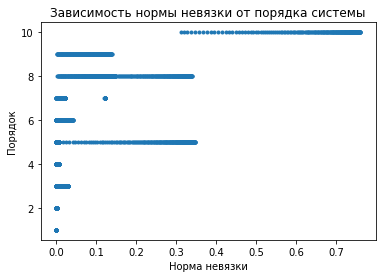

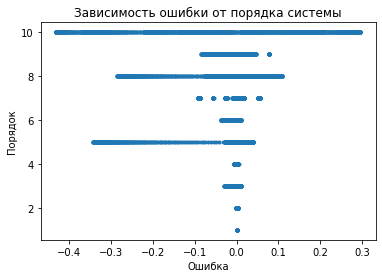

In [ ]:
plt.xlabel("Норма невязки")
plt.ylabel("Порядок")
plt.title("Зависимость нормы невязки от порядка системы")
plt.plot(n_discrs, UnivShapes, '.')
plt.show()
plt.xlabel("Ошибка")
plt.ylabel("Порядок")
plt.title("Зависимость ошибки от порядка системы")
plt.plot(discrs, UnivShapesD, '.')
pass

По графикам видно, что порядок системы влияет на ошибку и норму невязки, причём при увеличении порядка увеличивается и ошибка, и норма невязки. 

Теперь возьмём рандомную матрицу и вектор к ней. Изобразим на графиках зависимость ошибки и нормы невязки от параметра alpha

In [ ]:
A = np.random.rand(5,5)
b = np.random.rand(5,1)

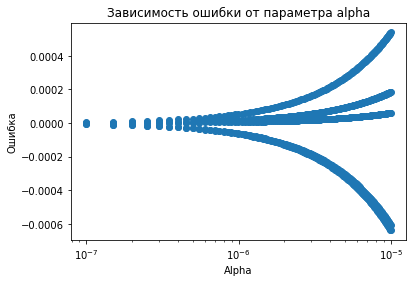

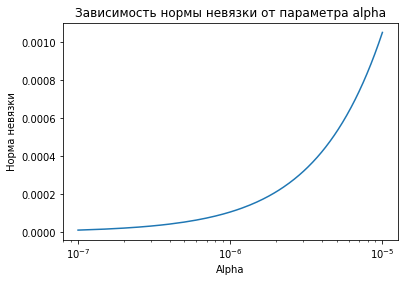

In [ ]:
x0, discr0, alpha0, x, discr, n_discr = tikhonov(A, b, alpha)
new_alpha =  np.linspace(0, 1, alpha.shape[0]*5)
for i in range(0, alpha.shape[0]*5):
  new_alpha[i] = alpha[i//5]
plt.ylabel("Ошибка")
plt.xlabel("Alpha")
plt.title("Зависимость ошибки от параметра alpha")
plt.semilogx(new_alpha, discr, 'o')
plt.show()
plt.ylabel("Норма невязки")
plt.xlabel("Alpha")
plt.title("Зависимость нормы невязки от параметра alpha")
plt.semilogx(alpha, n_discr)
pass

Вывод: с увеличением alpha ошибка и норма невязки тоже увеличиваются